In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=100 

plt.style.use('ggplot')
%matplotlib inline

In [40]:
df = pd.read_csv(r"C:\Users\NIDHAL\Desktop\lab-feature-extraction-master\we_fn_use_c_marketing_customer_value_analysis.csv")
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [41]:
categoricals = df.select_dtypes(np.object)
categoricals.head()

C:\Users\NIDHAL\AppData\Local\Temp\ipykernel_2308\3652177070.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = df.select_dtypes(np.object)


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [42]:
df.rename(columns=lambda n: n.replace(' ', '_').lower(), inplace=True)

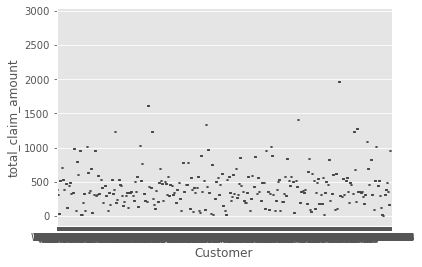

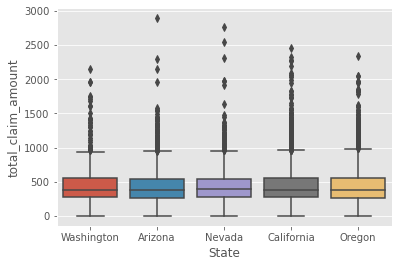

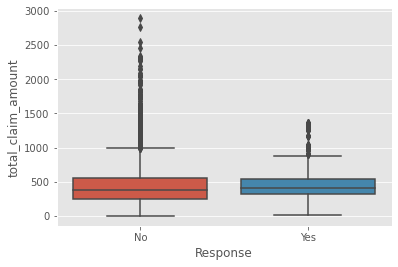

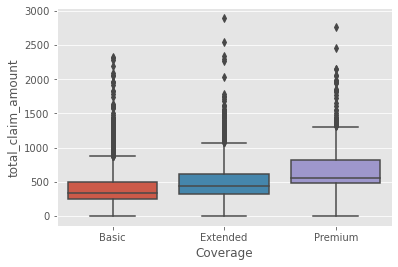

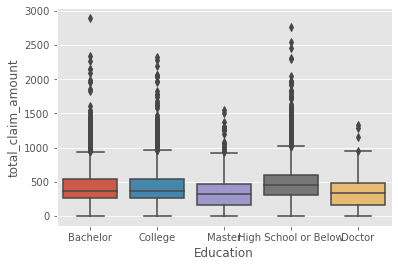

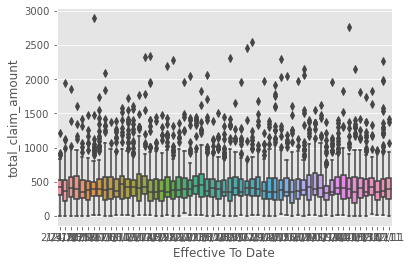

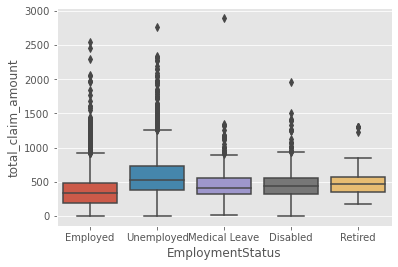

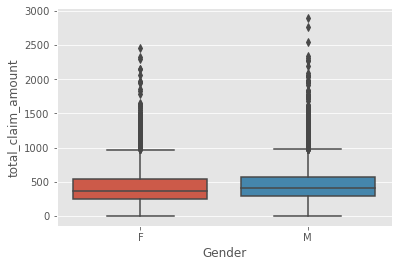

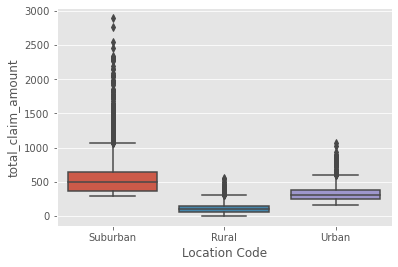

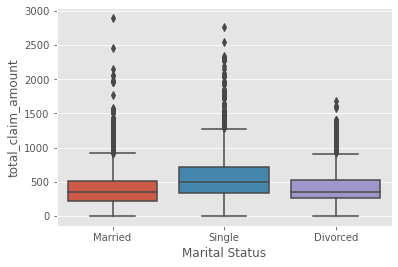

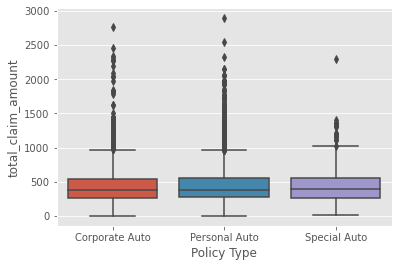

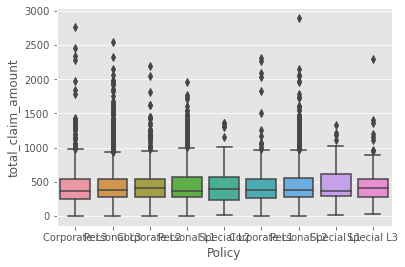

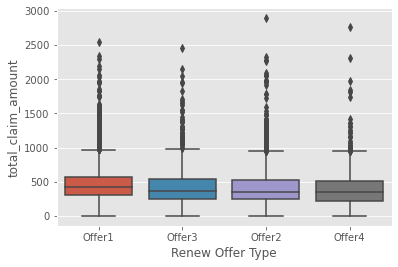

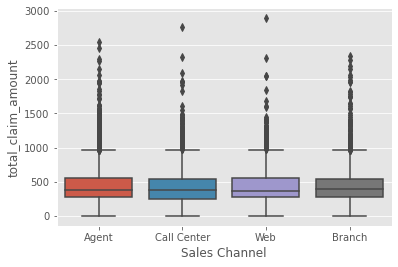

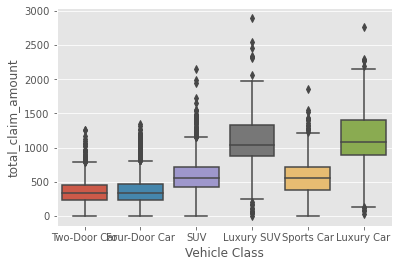

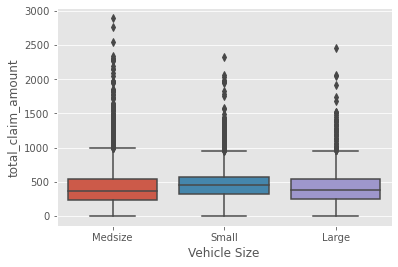

In [43]:
for n in categoricals:
    sns.boxplot( x=categoricals[n], y=df["total_claim_amount"] )
    plt.show()


In [44]:
for cat in categoricals:
    print(cat)
    print(categoricals[cat].value_counts(dropna=False)/len(categoricals))

Customer
BU79786    0.000109
PU81096    0.000109
CO75086    0.000109
WW52683    0.000109
XO38850    0.000109
             ...   
HS14476    0.000109
YL91587    0.000109
CT18212    0.000109
EW35231    0.000109
Y167826    0.000109
Name: Customer, Length: 9134, dtype: float64
State
California    0.344865
Oregon        0.284760
Arizona       0.186446
Nevada        0.096562
Washington    0.087366
Name: State, dtype: float64
Response
No     0.856799
Yes    0.143201
Name: Response, dtype: float64
Coverage
Basic       0.609591
Extended    0.300197
Premium     0.090212
Name: Coverage, dtype: float64
Education
Bachelor                0.300854
College                 0.293519
High School or Below    0.287059
Master                  0.081125
Doctor                  0.037443
Name: Education, dtype: float64
Effective To Date
1/10/11    0.021349
1/27/11    0.021239
2/14/11    0.020363
1/26/11    0.019816
1/17/11    0.019707
1/19/11    0.019597
1/31/11    0.019488
1/3/11     0.019488
1/20/11    0.0189

<AxesSubplot:>

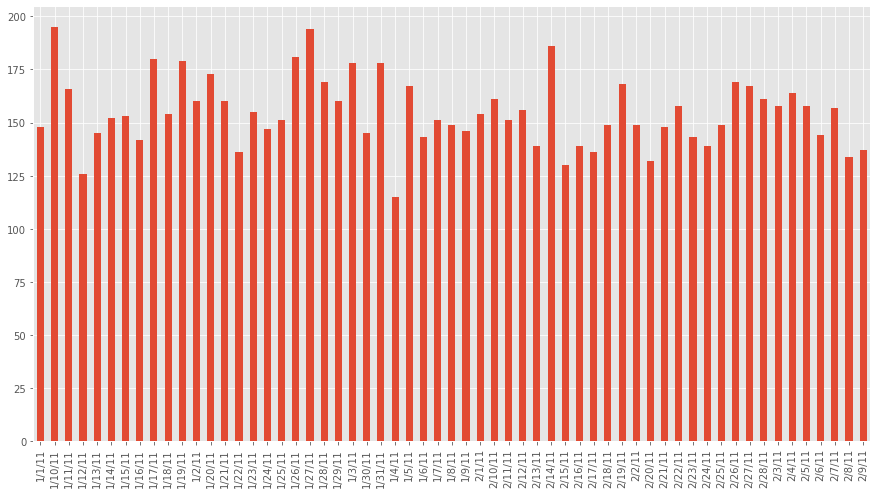

In [45]:
plt.figure(figsize=(15,8))
df["effective_to_date"].value_counts().sort_index().plot(kind='bar')


In [46]:
numericals = df.select_dtypes(np.number)


Use the function to remove the outliers and apply it to the dataframe.

C:\Users\NIDHAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


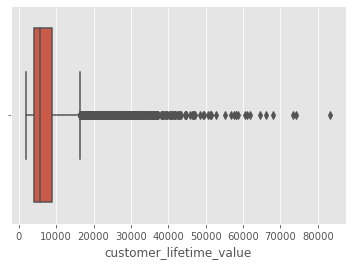

C:\Users\NIDHAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


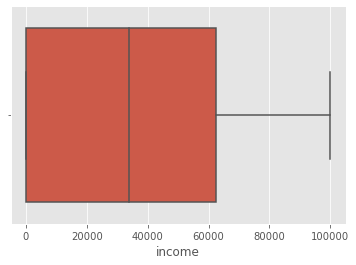

C:\Users\NIDHAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


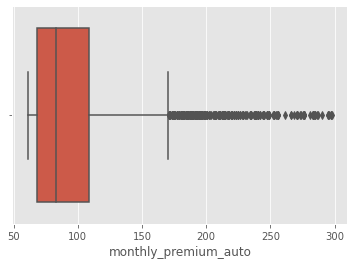

C:\Users\NIDHAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


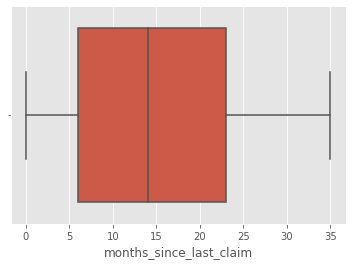

C:\Users\NIDHAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


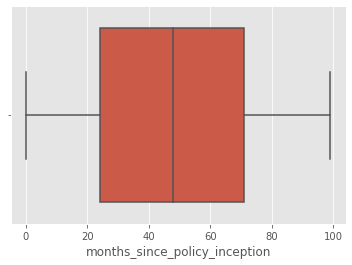

C:\Users\NIDHAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


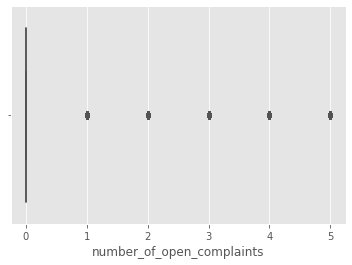

C:\Users\NIDHAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


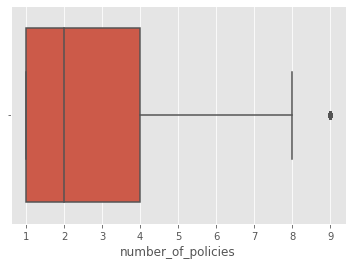

C:\Users\NIDHAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


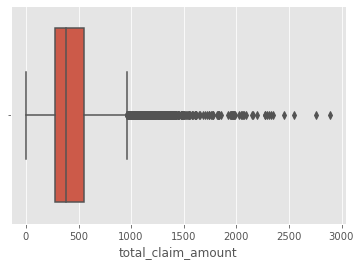

In [47]:
for column in numericals:
    sns.boxplot(numericals[column])
    plt.show()


In [48]:
def remove_outliers(data,column):
    print("outliers_data: ",data.shape)                    # dataframe with outliers
        
    Q1 = data[column].quantile(0.25) # first quantile
    Q3 = data[column].quantile(0.75) # third quantile
    IQR = Q3 - Q1                    # inter quantile range

    data = data[~(                        # negation so we get the datapoints within the whiskers
        (data[column] < (Q1 - 1.5 * IQR)) # datapoints left of the "left whisker"
        |(data[column] > (Q3 + 1.5 * IQR) # datapoints right of the 'right whisker'
        ))]

    print("cleaned data: ",data.shape)                    # data cleaned
    data.reset_index(drop=True, inplace=True)           # reset the index (to avoid NaNs later)
    return data


In [49]:
df = remove_outliers(df,"total_claim_amount")

outliers_data:  (9134, 24)
cleaned data:  (8681, 24)


Create a copy of the dataframe for the data wrangling.


In [50]:
df2 = df.copy()
numericals_copy = df2.select_dtypes(np.number)
categoricals_copy = df2.select_dtypes(object)

Normalize the continuous variables. You can use any one method you want.


In [51]:
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder

In [52]:
numeric_transformer = StandardScaler()

In [53]:
x = numericals.values
x_scaled = numeric_transformer.fit_transform(x)
numericals_copy=pd.DataFrame(x_scaled, columns=numericals_copy.columns)

Encode the categorical variables


In [54]:
from sklearn.compose import ColumnTransformer

In [55]:
categorical_transformer = OneHotEncoder()

In [56]:
feature_encoder = ColumnTransformer (
  transformers = [              
      ("catel", categorical_transformer, categoricals_copy)])

In [57]:
categoricals_copy["coverage"] = categoricals_copy["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
categoricals_copy["employmentstatus"] = categoricals_copy["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2, "Disabled" : 3, "Retired" : 4})
categoricals_copy["location_code"] = categoricals_copy["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})
categoricals_copy["vehicle_size"] = categoricals_copy["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})


In [58]:
dummies_list = ["state", "marital_status", "policy_type", "policy", "renew_offer_type","sales_channel", "vehicle_size"]

In [59]:
categoricals_copy = pd.get_dummies(categoricals_copy, prefix=dummies_list, columns=dummies_list, drop_first = True)


The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [60]:
time_df2 = pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)


In [61]:
time_df2["day"] = df2.effective_to_date.dt.day
time_df2["month"] = df2.effective_to_date.dt.month
time_df2["year"] = df2.effective_to_date.dt.year
time_df2

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.


In [62]:
df2.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())


customer                         False
state                            False
customer_lifetime_value           True
response                         False
coverage                         False
education                        False
effective_to_date                False
employmentstatus                 False
gender                           False
income                            True
location_code                    False
marital_status                   False
monthly_premium_auto              True
months_since_last_claim           True
months_since_policy_inception     True
number_of_open_complaints         True
number_of_policies                True
policy_type                      False
policy                           False
renew_offer_type                 False
sales_channel                    False
total_claim_amount                True
vehicle_class                    False
vehicle_size                     False
dtype: bool